# Iris Clustering Lab

In [1]:
import os
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from scipy import linalg
from sklearn.metrics import normalized_mutual_info_score
from scipy.spatial import distance
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

### Load the Iris Dataset

In [3]:
random_state = 17  # random seed

In [4]:
iris = load_iris()
iris_X = iris.data  # data
iris_Y = iris.target  # Target labels

### KMeans Clustering

In [5]:
kmeans = KMeans(n_clusters=3, random_state=random_state)  # Apply KMeans clustering with 3 clusters
y_pred_KMeans = kmeans.fit_predict(iris_X)  # Fit the KMeans model to the dataset iris and predict the cluster labels for each data point
y_pred_KMeans = list(y_pred_KMeans)  # Convert the predicted cluster labels (numpy array) to a list

### Gaussian Mixture Model Clustering

In [6]:
gmm = GaussianMixture(n_components=3, random_state=random_state)  # Apply Gaussian Mixture Model clustering with 3 components
y_pred_GMM = gmm.fit_predict(iris_X)  # Fit the Gaussian Mixture model to the dataset iris and predict the cluster labels for each data point
y_pred_GMM = list(y_pred_GMM)  # Convert the predicted cluster labels (numpy array) to a list

### Calculate RBF Kernel Matrix for Spectral Clustering

In [7]:
rbf_param = 2  # Set the parameter for the RBF
W = np.exp(-distance.cdist(iris_X, iris_X, 'sqeuclidean') / (2 * rbf_param ** 2))  # Calculate W_ij and form W matrix
D = np.diag(W.sum(axis=1))  # Compute the degree matrix D

# Normalize the kernel matrix
D_inv_sqrt = np.linalg.inv(np.sqrt(D))  # Calculate D^(-1/2)
M = np.dot(np.dot(D_inv_sqrt, W), D_inv_sqrt)  # Normalize the kernel matrix using the degree matrix (D^(-1/2)·W·D^(-1/2))

U = linalg.svd(M)  # Perform SVD to get spectral clustering input
Usubset = U[0][:, 0:3]  # Select the top 3 eigenvectors
y_pred_sc = KMeans(n_clusters=3, random_state=random_state).fit_predict(Usubset)  # Apply KMeans clustering on the normalized eigenvectors
y_pred_sc = list(y_pred_sc)  # Convert the predicted cluster labels (numpy array) to a list

### Sklearn Spectral Clustering

In [8]:
spectral = SpectralClustering(n_clusters=3, gamma=1 / (2 * rbf_param ** 2), random_state=random_state)  # Apply Gaussian Mixture Model clustering with 3 components
y_pred_sc_sklearn = spectral.fit_predict(iris_X)  # Fit the model to the input data iris and predict the cluster labels for each data point
y_pred_sc_sklearn = list(y_pred_sc_sklearn)  # Convert the predicted cluster labels (numpy array) to a list

### Data Visualization

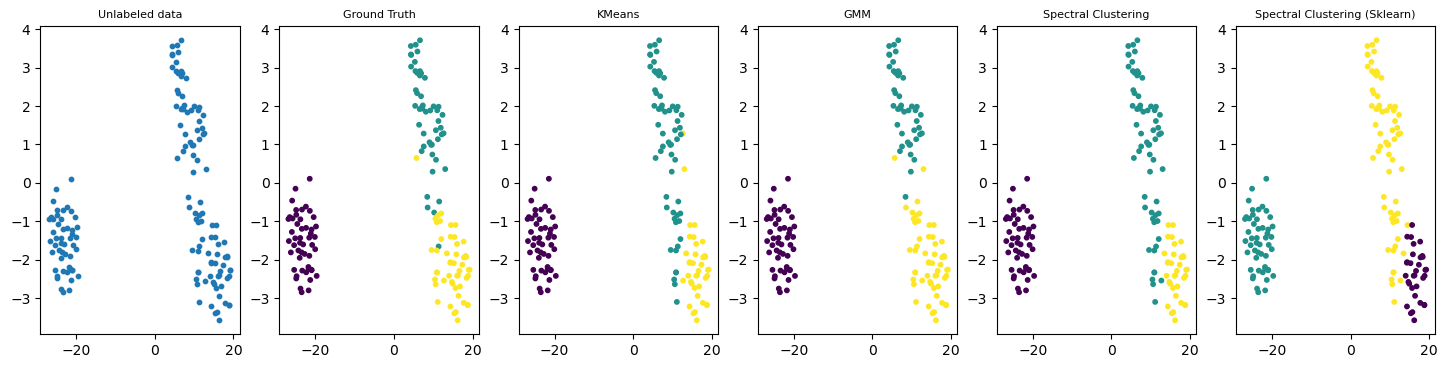

In [9]:
tsne = TSNE(n_components=2, init='pca', random_state=random_state)  # Mapping 4-dimensional data to 2-dimensional data
X = tsne.fit_transform(iris_X)

plt.figure(figsize=(18, 4))

# Plot the t-SNE output as unlabeled data
plt.subplot(1, 6, 1)
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title('Unlabeled data', fontsize=8)

# Plot the actual ground truth labels
plt.subplot(1, 6, 2)
iris_Y = list(iris_Y)
plt.scatter(X[:, 0], X[:, 1], c=iris_Y, s=10)
plt.title('Ground Truth', fontsize=8)

# Plot KMeans clustering result
plt.subplot(1, 6, 3)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_KMeans, s=10)  # Plot KMeans clustering result
plt.title('KMeans', fontsize=8)

# Plot GMM clustering result
plt.subplot(1, 6, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_GMM, s=10)  # Plot GMM clustering result
plt.title('GMM', fontsize=8)

# Plot custom spectral clustering result
plt.subplot(1, 6, 5)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_sc, s=10)  # Plot Spectral clustering result using custom kernel-based method
plt.title('Spectral Clustering', fontsize=8)

# Plot sklearn spectral clustering result
plt.subplot(1, 6, 6)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_sc_sklearn, s=10)  # Plot Sklearn Spectral clustering result
plt.title('Spectral Clustering (Sklearn)', fontsize=8)

plt.show()

### Calculate the Normalized Mutual Information Score

In [10]:
nmi_kmeans = normalized_mutual_info_score(iris_Y, y_pred_KMeans)
nmi_gmm = normalized_mutual_info_score(iris_Y, y_pred_GMM)
nmi_spectral_custom = normalized_mutual_info_score(iris_Y, y_pred_sc)
nmi_spectral_sklearn = normalized_mutual_info_score(iris_Y, y_pred_sc_sklearn)

print('NMI (KMeans):', nmi_kmeans)
print('NMI (GMM):', nmi_gmm)
print('NMI (Spectral Clustering - Custom):', nmi_spectral_custom)
print('NMI (Spectral Clustering - Sklearn):', nmi_spectral_sklearn)

NMI (KMeans): 0.7581756800057784
NMI (GMM): 0.8996935451597475
NMI (Spectral Clustering - Custom): 0.7979885217013319
NMI (Spectral Clustering - Sklearn): 0.7837403461384026
